#Case Study 1 : Collecting Data from Twitter

** Due Date: February 10, before the class**

*------------

**TEAM Members:**
    
    Haley Huang
    Helen Hong
    Tom Meagher
    Tyler Reese

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://www.learndatasci.com/wp-content/uploads/2015/08/Mining-the-Social-Web-2nd-Edition.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)


** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

#Problem 1: Sampling Twitter Data with Streaming API about a certain topic

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [1]:
import io
import json
import twitter

# API CONSTANTS
CONSUMER_KEY = '92TpJf8O0c9AWN3ZJjcN8cYxs'
CONSUMER_SECRET ='dyeCqzI2w7apETbTUvPai1oCDL5oponvZhHSmYm5XZTQbeiygq'
OAUTH_TOKEN = '106590533-SEB5EGGoyJ8EsjOKN05YuOQYu2rg5muZgMDoNrqN'
OAUTH_TOKEN_SECRET = 'BficAky6uGyGfRzDGJqZYVKo0HS6G6Ex3ijYW3zy3kjNJ'
    
def oauth_login(token, token_secret, consumer_key, consumer_secret):
    """
    Snag an auth from Twitter
    """
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    return auth

def save_json(filename, data):
    """
    Save json data to a filename
    """
    print 'Saving data into {0}.json...'.format(filename)
    with io.open('json/{0}.json'.format(filename), 
                 'w', encoding='utf-8') as f:
        f.write(unicode(json.dumps(data, ensure_ascii=False)))

def load_json(filename):
    """
    Load json data from a filename
    """
    print 'Loading data from {0}.json...'.format(filename)
    with open('json/{0}.json'.format(filename)) as f:    
        return json.load(f)

In [2]:
# Create an api and stream instance
auth = oauth_login(CONSUMER_KEY, CONSUMER_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
twitter_api = twitter.Twitter(auth=auth)
twitter_stream = twitter.TwitterStream(auth=auth)
if twitter_api and twitter_stream:
    print 'Bingo! API and stream set up!'
else:
    print 'Hmmmm, something is wrong here.'

Bingo! API and stream set up!


In [ ]:
# # Collect 500 Patriots tweets from stream
# track = "Patriots"
# stream = twitter_stream.statuses.filter(track=track)

# results = []
# counter = 0
# for tweet in stream:
#     if counter > 499:
#         break
#     else:
#         if counter % 25 == 0:
#             print counter
#         results.append(tweet)
#     counter+=1
    
# # Save tweets to file
# filename = "patriots"
# save_json(filename, results)

In [29]:
# Use this code to load tweets that have already been collected

filename = "patriots"
results = load_json(filename)
print "Loading tweets into results variable"
print len(results)

Loading data from patriots.json...
Loading tweets into results variable
500


In [ ]:
# Compute Additional Statistics about the tweets collected

# Determine the average number of words in the text of each tweet
def average_words(tweet_texts):
    total_words =  sum([len(s.split()) for s in tweet_texts])
    return 1.0*total_words/len(tweet_texts)

tweet_texts = [ tweet['text'] 
                 for tweet in results ]

print 'Average number of words:', average_words(tweet_texts)

# Calculate the lexical diversity of all words contained in the tweets
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

words = [ word 
          for tweet in tweet_texts 
              for word in tweet.split() ]

print 'Lexical Diversity:', lexical_diversity(words)

###Report some statistics about the tweets you collected 

* The topic of interest: Patriots

* The total number of tweets collected:  500

* Average number of words per tweet: 16.122

* Lexical Diversity of all words contained in the collection of tweets: 0.29

*-----------------------

#Problem 2: Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

In [5]:
from collections import Counter
from prettytable import PrettyTable
import nltk

tweet_texts = [ tweet['text'] 
                 for tweet in results ]
words = [ word 
          for tweet in tweet_texts 
              for word in tweet.split()
                 if word not in ['RT', '&amp;', 'The'] # filter out stop words
        ]

# Use the natural language toolkit to eliminate stop words

nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

non_stop_words = [w for w in words if w not in stop_words]

# frequency of words
count = Counter(non_stop_words).most_common()

# table of the top 30 words with their counts
pretty_table = PrettyTable(field_names=['Word', 'Count']) 
[ pretty_table.add_row(w) for w in count[:30] ]
pretty_table.align['Word'] = 'l'
pretty_table.align['Count'] = 'r'
print pretty_table

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tyler\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
+-------------------------+-------+
| Word                    | Count |
+-------------------------+-------+
| Patriots                |   189 |
| @USFreedomArmy:         |    62 |
| Join                    |    60 |
| I                       |    57 |
| patriots                |    55 |
| @Patriots:              |    50 |
| win                     |    46 |
| winter                  |    42 |
| Super                   |    41 |
| Bowl                    |    40 |
| enlist                  |    36 |
| perfect                 |    35 |
| enter                   |    34 |
| http://t.co/oSPeY3QMpH. |    34 |
| fight                   |    34 |
| @Patriots               |    34 |
| https://t.…             |    34 |
| accessory.              |    34 |
| #PatsHatFriday          |    34 |
| weather                 |    34 |
| Rules:    

**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [6]:
from collections import Counter
from prettytable import PrettyTable

# Create a list of all tweets with at least one retweet, and index the originator of that tweet and the text.
retweets = [
            (tweet['retweet_count'],
            tweet['retweeted_status']['user']['screen_name'],
            tweet['text'])
            
            #Ensure that a retweet exists
            for tweet in results                      
                if tweet.has_key('retweeted_status')
            ]

pretty_table = PrettyTable(field_names = ['Count','Screen Name','Text'])

# Sort tweets by descending number of retweets and display the top 10 results in a table.
[pretty_table.add_row(row) for row in sorted(retweets, reverse = True)[:10]]
pretty_table.max_width['Text'] = 50
pretty_table.align = 'l'
print pretty_table

+-------+-----------------+----------------------------------------------------+
| Count | Screen Name     | Text                                               |
+-------+-----------------+----------------------------------------------------+
| 0     | vinniekniffen   | RT @vinniekniffen: Slanted journalism, are slanted |
|       |                 | journalists a bigger threat to America than        |
|       |                 | freedom loving patriots? Yes  https://t.co/o…      |
| 0     | thesportsden45  | RT @thesportsden45: BEAUTIFULLY AUTOGRAPHED RARE   |
|       |                 | Rob Ninkovich BLACK #Patriots Wilson #NFL          |
|       |                 | #Football-JSA/COA https://t.co/bpjIpTAsXU #Pats …  |
| 0     | thegeneralcd    | RT @thegeneralcd: Congrats 2  @LMSPatriots Lady    |
|       |                 | Patriots 8th grade Girls Back-2-Back Desoto County |
|       |                 | Champs @dcsaa_sports @TheBurgSports http…          |
| 0     | sue51684        | 

Another measure of tweet "popularity" could be the number of times it is favorited.  The following calculates the top-10 tweets with the most "favorites"

In [7]:
from prettytable import PrettyTable

# Determine the number of "favorites" for each tweet collected.

favorites = [
            (tweet['favorite_count'],
             tweet['text'])
            for tweet in results
            ]
            
pretty_table = PrettyTable(field_names = ['Count','Text'])

# Sort tweets by descending number of favorites and display the top 10 results in a table.
[pretty_table.add_row(row) for row in sorted(favorites, reverse = True)[:10]]
pretty_table.max_width['Text'] = 75
pretty_table.align = 'l'
print pretty_table

+-------+-----------------------------------------------------------------------------+
| Count | Text                                                                        |
+-------+-----------------------------------------------------------------------------+
| 0     | ★★★ Patriots Who Dare... Join our fight to save America! ➠ Click Here       |
|       | https://t.co/x76SZaT6Gf #BB4SP https://t.co/lKT9E2oHj2                      |
| 0     | ★★★ Patriots Who Dare... Join our fight to save America! ➠ Click Here       |
|       | https://t.co/Zdm2cJIKzd #BB4SP https://t.co/fp8z3FWswj                      |
| 0     | ★★★ Patriots Who Dare... Join our fight to save America! ➠ Click Here       |
|       | https://t.co/TtJLEDNwzc #BB4SP https://t.co/m1RK1WMOhS                      |
| 0     | ★★★ Patriots Who Dare... Join our fight to save America! ➠ Click Here       |
|       | https://t.co/TM3sg8AXwm #BB4SP https://t.co/HTtizrC7cV                      |
| 0     | what happened to this?

**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [8]:
from collections import Counter
from prettytable import PrettyTable

# Extract the screen names which appear among the collection of tweets
screen_names = [user_mention['screen_name']
               for tweet in results
                   for user_mention in tweet['entities']['user_mentions']]

# Extract the hashtags which appear among the collection of tweets
hashtags = [ hashtag['text']
           for tweet in results
               for hashtag in tweet['entities']['hashtags']]

# Simultaneously determine the frequency of screen names/hashtags, and display the top 10 most common in a table.
for label, data in (('Screen Name',screen_names),
                   ('Hashtag',hashtags)):
    pretty_table = PrettyTable(field_names =[label,'Count'])
    counter = Counter(data)
    [ pretty_table.add_row(entity) for entity in counter.most_common()[:10]]
    pretty_table.align[label] ='l'
    pretty_table.align['Count'] = 'r'
    print pretty_table

+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| Patriots        |   109 |
| USFreedomArmy   |    62 |
| Giants          |    21 |
| nflnetwork      |    12 |
| GilletteStadium |     9 |
| PatriotsExtra   |     8 |
| MattForte22     |     8 |
| ArcticFox2016   |     8 |
| NaughtyBeyotch  |     7 |
| AKC0G           |     6 |
+-----------------+-------+
+---------------+-------+
| Hashtag       | Count |
+---------------+-------+
| PatsHatFriday |    34 |
| Patriots      |    31 |
| BB4SP         |    23 |
| PJNET         |    12 |
| PATRIOTS      |    11 |
| NFL           |    10 |
| TomBrady      |    10 |
| SuperBowl50   |    10 |
| Free          |     9 |
| FREERIDE      |     9 |
+---------------+-------+


*------------------------

#Problem 3: Getting "All" friends and "All" followers of a popular user in twitter


* choose a popular twitter user who has many followers, such as "ladygaga".
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [10]:
#----------------------------------------------
import sys
import time
from urllib2 import URLError
from httplib import BadStatusLine
import json
from functools import partial
from sys import maxint

# The following is the "general-purpose API wrapper" presented in "Mining the Social Web" for making robust twitter requests.
# This function can be used to accompany any twitter API function.  It force-breaks after receiving more than max_errors
# error messages from the Twitter API.
def make_twitter_request(twitter_api_func, max_errors = 10, *args, **kw):
    def handle_twitter_http_error(e, wait_period = 2, sleep_when_rate_limited = True):
        
        if wait_period > 3600:
            print >> sys.stderr, 'Too many retries. Quitting.'
            raise e
        
        if e.e.code == 401:
            print >> sys.stderr, 'Encountered 401 Error (Not Authorized)'
            return None
        
        elif e.e.code == 404:
            print >> sys.stderr, 'Encountered 404 Error (Not Found)'
            return None
        
        elif e.e.code == 429:
            print >> sys.stderr, 'Encountered 429 Error (Rate Limit Exceeded)'
            if sleep_when_rate_limited:
                print >> sys.stderr, "Retrying again in 15 Minutes...ZzZ..."
                sys.stderr.flush()
                time.sleep(60*15 + 5)
                print >> sys.stderr, '...ZzZ...Awake now and trying again.'
                return 2
            else:
                raise e
                
        elif e.e.code in (500,502,503,504):
            print >> sys.stderr, 'Encountered %i Error.  Retrying in %i seconds' % \
                (e.e.code, wait_period)
            time.sleel(wait.period)
            wait.period *= 1.5
            return wait_period
        
        else:
            raise e
            
    wait_period = 2
    error_count = 0
    
    while True:
        try:
            return twitter_api_func(*args,**kw)
        except twitter.api.TwitterHTTPError, e:
            error_count = 0
            wait_period = handle_twitter_http_error (e, wait_period)
            if wait_period is None:
                return
            
        except URLError, e:
            error_count += 1
            print >> sys.stderr, "URLError encountered.  Continuing"
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise
        
        except BadStatusLine, e:
            error_count += 1
            print >> sys.stderr, "BadStatusLineEncountered.  Continuing"
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise

In [11]:
# This function uses the above Robust Request wrapper to retreive all friends and followers of a given user.  This code
# can be found in Chapter 9, the `Twitter Cookbook' in "Mining the social web"

from functools import partial
from sys import maxint

def get_friends_followers_ids(twitter_api, screen_name = None, user_id = None, friends_limit = maxint, followers_limit = maxint):
    assert(screen_name != None) != (user_id != None), \
    "Must have screen_name or user_id, but not both"
    
    # See https://dev.twitter.com/docs/api/1.1/get/friends/ids and
    # https://dev.twitter.com/docs/api/1.1/get/followers/ids for details
    # on API parameters
    
    get_friends_ids = partial(make_twitter_request, twitter_api.friends.ids, 
                              count=5000)
    get_followers_ids = partial(make_twitter_request, twitter_api.followers.ids, 
                                count=5000)

    friends_ids, followers_ids = [], []
    
    for twitter_api_func, limit, ids, label in [
                    [get_friends_ids, friends_limit, friends_ids, "friends"], 
                    [get_followers_ids, followers_limit, followers_ids, "followers"]
                ]:
        
        if limit == 0: continue
        
        cursor = -1
        while cursor != 0:
        
            # Use make_twitter_request via the partially bound callable...
            if screen_name: 
                response = twitter_api_func(screen_name=screen_name, cursor=cursor)
            else: # user_id
                response = twitter_api_func(user_id=user_id, cursor=cursor)

            if response is not None:
                ids += response['ids']
                cursor = response['next_cursor']
        
            print 'Fetched {0} total {1} ids for {2}'.format(len(ids), 
                                                    label, (user_id or screen_name))
        
            # XXX: You may want to store data during each iteration to provide an 
            # an additional layer of protection from exceptional circumstances
        
            if len(ids) >= limit or response is None:
                break
                
    return friends_ids[:friends_limit], followers_ids[:followers_limit]


Use the following code to retreive all friends and followers of @RobGronkowski.

In [ ]:
# Retrieve the friends and followers of a user and save to a json file.

screen_name = 'RobGronkowski'

gronk_friends_ids, gronk_followers_ids = get_friends_followers_ids(twitter_api, screen_name = screen_name)

filename = "gronk_friends"
print 'Saving tweets into {0}.json'.format(filename)
save_json(filename, gronk_friends_ids)

filename = "gronk_followers"
print 'Saving tweets into {0}.json'.format(filename)
save_json(filename, gronk_followers_ids)

Use this code to load the already-retrieved friends and followers from a json file.

In [18]:
screen_name = 'RobGronkowski'

gronk_followers_ids = load_json('gronk_followers')
gronk_friends_ids = load_json('gronk_friends')

#gronk_followers_ids = [float(i) for i in followers_ids.strip('[]').split(',')]
#gronk_friends_ids = [float(i) for i in friends_ids.strip('[]').split(',')]


Loading data from gronk_followers.json...
Loading data from gronk_friends.json...


In [14]:
# The following function retrieves the screen names of Twitter users, given their user IDs.  If a certain number of screen
# names is desired (for example, 20) max_ids limits the number retreived.

def get_screen_names(twitter_api, user_ids = None, max_ids = None):

    response = []
    
    items = user_ids
    
    # Due to individual user security settings, not all user profiles can be obtained.  Iterate over all user IDs
    # to ensure at least (max_ids) screen names are obtained.
    
    while len(response) < max_ids:
        items_str = ','.join([str(item) for item in items[:100]])
        items = items[100:]
        
        responses = make_twitter_request(twitter_api.users.lookup, user_id = items_str)
        
        response += responses
    
    items_to_info = {}
     
    # The above loop has retrieved all user information.    
    for user_info in response:
        items_to_info[user_info['id']] = user_info
    
    # Extract only the screen names obtained.  The keys of items_to_info are the user ID numbers.
    names = [items_to_info[number]['screen_name']
            for number in items_to_info.keys()
            ]

    numbers =[number for number in items_to_info.keys()]

    return names , numbers

In [15]:
from prettytable import PrettyTable

# Given a set of user ids, this function calls get_screen_names and plots a table of the first (max_ids) ID's and screen names.
def table_ids_screen_names(twitter_api, user_ids = None, max_ids = None):

    names, numbers = get_screen_names(twitter_api, user_ids = user_ids, max_ids = max_ids)

    ids_screen_names = zip(numbers, names)
    
    pt = PrettyTable(field_names = ['User ID','Screen Name'])
    [ pt.add_row (row) for row in ids_screen_names[:max_ids]]
    pt.align = 'l'
    print pt

In [16]:
# Given a list of friends_ids and followers_ids, this function counts and prints the size of each collection.
# It then plots a tables of the first (max_ids) listed friends and followers.
def display_friends_followers(screen_name, friends_ids, followers_ids ,max_ids = None):
    friends_ids_set, followers_ids_set = set(friends_ids),set(followers_ids)
    
    print
    print '{0} has {1} friends.  Here are {2}:'.format(screen_name, len(friends_ids_set),max_ids)
    print
    table_ids_screen_names(twitter_api, user_ids = friends_ids, max_ids = max_ids)
    print
    print '{0} has {1} followers.  Here are {2}:'.format(screen_name,len(followers_ids_set),max_ids)
    print
    table_ids_screen_names(twitter_api, user_ids = followers_ids, max_ids = max_ids)
    print

In [19]:
display_friends_followers(screen_name = screen_name, friends_ids = gronk_friends_ids, followers_ids = gronk_followers_ids, max_ids = 20)


RobGronkowski has 384 friends.  Here are 20:

+------------+-----------------+
| User ID    | Screen Name     |
+------------+-----------------+
| 20575752   | marcelluswiley  |
| 890891     | BleacherReport  |
| 2992537113 | GronkPartyBus   |
| 2966774301 | uninterrupted   |
| 218748456  | Drubnation      |
| 25367082   | samanthapeszek  |
| 3020277803 | ninko50         |
| 67381805   | StaffordBros    |
| 63253045   | MonsterEnergy   |
| 123276343  | BarstoolBigCat  |
| 743044668  | opendorse       |
| 343546941  | CatherinVaritek |
| 2227768384 | goon356         |
| 26053643   | jimmykimmel     |
| 229293125  | RontezMiles     |
| 34461255   | ImDJHollywood   |
| 21111883   | ddlovato        |
| 1683163405 | CaseyMuhtadi    |
| 829673054  | DannyAmendola   |
| 30274144   | hollyrpeete     |
+------------+-----------------+

RobGronkowski has 1263239 followers.  Here are 20:

+--------------------+-----------------+
| User ID            | Screen Name     |
+--------------------+----

* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [20]:
# Given a list of friends_ids and followers_ids, this function use set intersection to find the number of mutual friends.
# It then plots a table of the first (max_ids) listed mutual friends.

def display_mutual_friends(screen_name, friends_ids, followers_ids ,max_ids = None):
    friends_ids_set, followers_ids_set = set(friends_ids),set(followers_ids)
    
    print
    print '{0} has {1} mutual friends.  Here are {2}:'.format(screen_name, len(friends_ids_set.intersection(followers_ids_set)),max_ids)
    print
    mutual_friends_ids = list(friends_ids_set.intersection(followers_ids_set))
    table_ids_screen_names(twitter_api, user_ids = mutual_friends_ids, max_ids = max_ids)

In [21]:
display_mutual_friends(screen_name = screen_name, friends_ids = gronk_friends_ids, followers_ids = gronk_followers_ids, max_ids = 20)


RobGronkowski has 335 mutual friends.  Here are 20:

+------------+-----------------+
| User ID    | Screen Name     |
+------------+-----------------+
| 1059194370 | kobebryant      |
| 191650646  | viccarucci      |
| 314298886  | Simzy18         |
| 17587207   | boburnham       |
| 20575752   | marcelluswiley  |
| 84451338   | QuintonAaron    |
| 26053643   | jimmykimmel     |
| 101852687  | ZIMMERWIZ       |
| 145745936  | RobinMeade      |
| 22938645   | EricStangel     |
| 142364694  | Shandrewpr      |
| 29653015   | MarcusSmith_    |
| 128102424  | Chan95Jones     |
| 2992537113 | GronkPartyBus   |
| 41293339   | ckreiswirthESPN |
| 2966774301 | uninterrupted   |
| 61604894   | DWXXIII         |
| 198735903  | GordieGronk     |
| 25880097   | GronkDreams87   |
| 207923746  | Timbaland       |
+------------+-----------------+


*------------------------

#Problem 4: Explore the data 

Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API

The following code was used to collect all Twitter followers of the Patriots, Broncos, and Panthers

In [ ]:
## PATRIOTS
patriots_friends_ids, patriots_followers_ids = get_friends_followers_ids(twitter_api, screen_name = 'Patriots')

save_json('Patriots_Followers',patriots_followers_ids)
save_json('Patriots_Friends', patriots_friends_ids)

## BRONCOS
broncos_friends_ids, broncos_followers_ids = get_friends_followers_ids(twitter_api, screen_name = 'Broncos')

save_json('Broncos_Followers',broncos_followers_ids)
save_json('Broncos_Friends', broncos_friends_ids)

## PANTHERS
panthers_friends_ids, panthers_followers_ids = get_friends_followers_ids(twitter_api, screen_name = 'Panthers')

save_json('Panthers_Followers',panthers_followers_ids)
save_json('Panthers_Friends', panthers_friends_ids)

This code is used to load the above followers, having already been collected.  It then makes a venn-diagram comparing the mutual followers between the three teams.

In [33]:
patriots_followers_ids = load_json('Patriots_Followers')
broncos_followers_ids = load_json('Broncos_Followers')
panthers_followers_ids = load_json('Panthers_Followers')

Loading data from Patriots_Followers.json...
Loading data from Broncos_Followers.json...
Loading data from Panthers_Followers.json...


<matplotlib_venn._common.VennDiagram instance at 0x0000000025857F88>

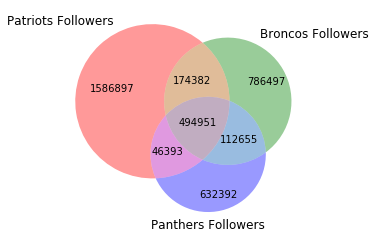

In [35]:
%matplotlib inline
from matplotlib_venn import venn3

patriots_followers_set = set(patriots_followers_ids)
broncos_followers_set = set(broncos_followers_ids)
panthers_followers_set = set(panthers_followers_ids)

venn3([patriots_followers_set, broncos_followers_set, panthers_followers_set], ('Patriots Followers', 'Broncos Followers', 
                                                                                'Panthers Followers'))

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through myWPI, in the Assignment "Case Study 1".
        
** Note: Each team just need to submit one submission in myWPI **

# Grading Criteria:

** Totoal Points: 120 **


---------------------------------------------------------------------------
** Notebook:  **
    Points: 80


    -----------------------------------
    Qestion 1:
    Points: 20
    -----------------------------------
    
    (1) Select a topic that you are interested in.
    Points: 6 
    
    (2) Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million. Please check whether the total number of tweets collected is larger than 200?
    Points: 10 
    
    
    (3) Store the tweets you downloaded into a local file (txt file or json file)
    Points: 4 
    
    
    -----------------------------------
    Qestion 2:
    Points: 20
    -----------------------------------
    
    1. Word Count

    (1) Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets.
    Points: 4 

    (2) Plot a table of the top 30 words with their counts 
    Points: 4 
    
    2. Find the most popular tweets in your collection of tweets
    plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.
    Points: 4 
    
    3. Find the most popular Tweet Entities in your collection of tweets

    (1) plot a table of the top 10 hashtags, 
    Points: 4 

    (2) top 10 user mentions that are the most popular in your collection of tweets.
    Points: 4 
    
    
    -----------------------------------
    Qestion 3:
    Points: 20
    -----------------------------------
    
    (1) choose a popular twitter user who has many followers, such as "ladygaga".
    Points: 4 

    (2) Get the list of all friends and all followers of the twitter user.
    Points: 4 

    (3) Plot 20 out of the followers, plot their ID numbers and screen names in a table.
    Points: 4 

    (4) Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.
    Points: 4 
    
    (5) Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table
    Points: 4 
  
    -----------------------------------
    Qestion 4:  Explore the data
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API




---------------------------------------------------------------------------
** Report: communicate the results**
    Points: 20

(1) What data you collected?
    Points: 5 

(2) Why this topic is interesting or important to you? (Motivations)
    Points: 5 

(3) How did you analyse the data?
    Points: 5 

(4) What did you find in the data?
(please include figures or tables in the report, but no source code)
    Points: 5 



---------------------------------------------------------------------------
** Slides (for 10 minutes of presentation): Story-telling **
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 

